### Boosted Bayesian Tree Model with Simulated Data
##### Author: Sofian Othmane 
##### University: UCL
##### Date: February 5, 2025

In [17]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from scipy import stats

In [19]:
# Set random seed
np.random.seed(42)

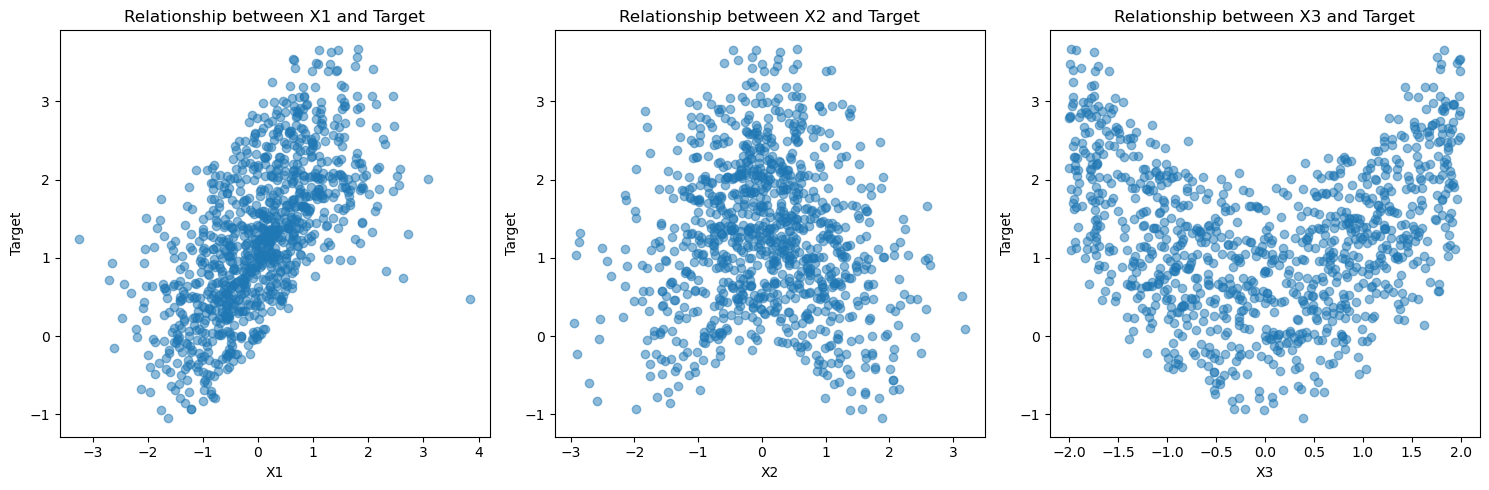

In [21]:
# 1. Generate Synthetic Data
# ------------------------
def generate_synthetic_data(n_samples=1000):
    """
    Generate synthetic data with non-linear relationships and some noise
    """
    # Generate features
    X1 = np.random.normal(0, 1, n_samples)
    X2 = np.random.normal(0, 1, n_samples)
    X3 = np.random.uniform(-2, 2, n_samples)
    
    # Generate target with non-linear relationships
    y = (
        np.sin(X1) + 
        np.exp(-X2**2) + 
        0.5 * X3**2 +
        np.random.normal(0, 0.1, n_samples)
    )
    
    # Create feature matrix
    X = np.column_stack([X1, X2, X3])
    feature_names = ['X1', 'X2', 'X3']
    
    return pd.DataFrame(X, columns=feature_names), pd.Series(y, name='target')

# Generate data
X, y = generate_synthetic_data()

# Plot the relationships
plt.figure(figsize=(15, 5))
for i, col in enumerate(X.columns):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.title(f'Relationship between {col} and Target')
plt.tight_layout()
plt.show()


In [23]:
# 2. Split the Data
# ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 3)
Testing set shape: (200, 3)


In [25]:
# 3. Train Boosted Bayesian Tree Model
# ----------------------------------
# Initialize XGBoost model with Bayesian-like parameters
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42
)

# Fit the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
# 4. Model Evaluation
# -----------------
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\nModel Performance Metrics:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")


Model Performance Metrics:
Training RMSE: 0.1074
Testing RMSE: 0.1844
Training R²: 0.9874
Testing R²: 0.9612


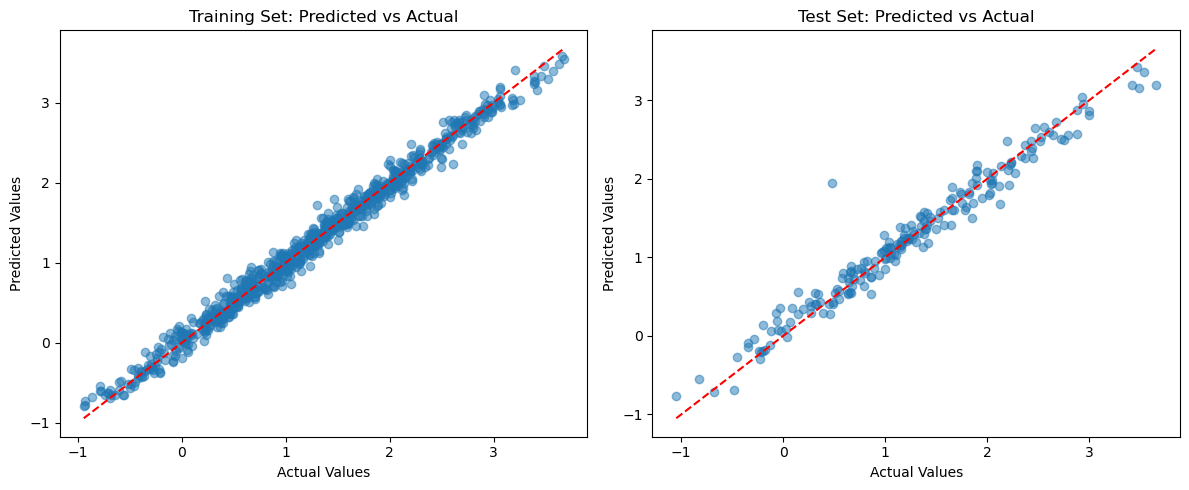

In [29]:
# 5. Visualization of Results
# -------------------------
# Plot predicted vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Predicted vs Actual')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Predicted vs Actual')

plt.tight_layout()
plt.show()

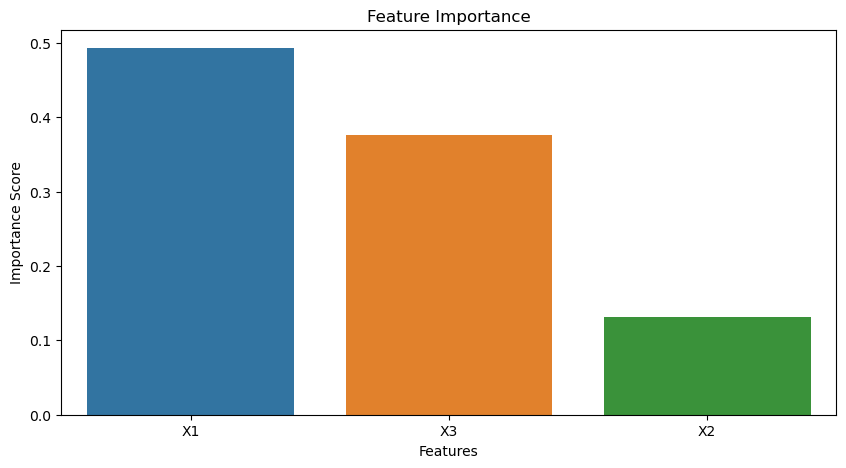

In [31]:
# 6. Feature Importance Analysis
# ---------------------------
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance, x='feature', y='importance')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


C:\Users\sofia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sofia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


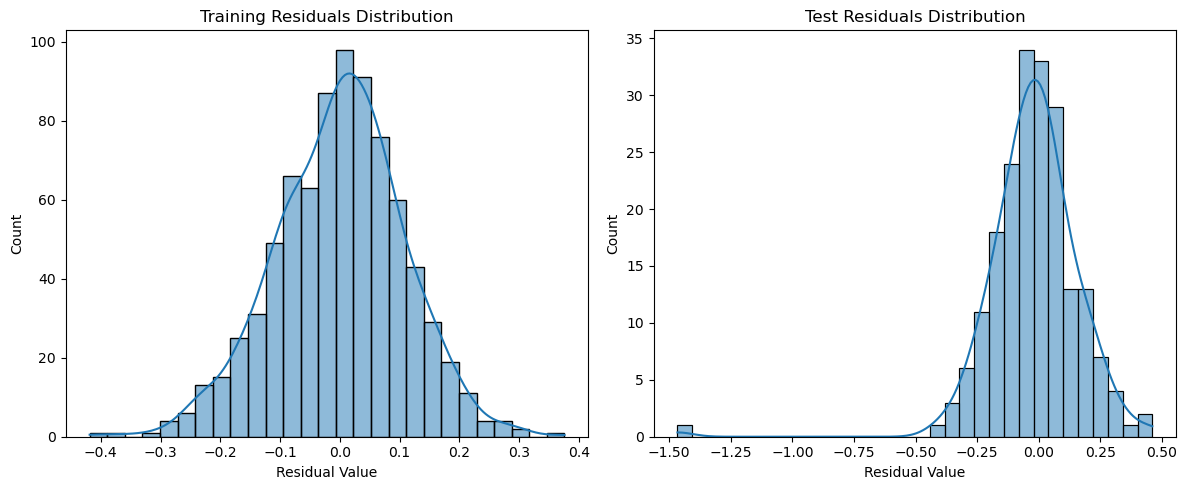


Residuals Analysis:
Training Set:
Mean of residuals: -0.0001
Shapiro-Wilk test p-value: 0.1061

Test Set:
Mean of residuals: -0.0187
Shapiro-Wilk test p-value: 0.0000


In [33]:
# 7. Residual Analysis
# ------------------
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_train, kde=True)
plt.title('Training Residuals Distribution')
plt.xlabel('Residual Value')

plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True)
plt.title('Test Residuals Distribution')
plt.xlabel('Residual Value')

plt.tight_layout()
plt.show()

# Print statistical tests for residuals
print("\nResiduals Analysis:")
print("Training Set:")
print(f"Mean of residuals: {np.mean(residuals_train):.4f}")
print(f"Shapiro-Wilk test p-value: {stats.shapiro(residuals_train)[1]:.4f}")

print("\nTest Set:")
print(f"Mean of residuals: {np.mean(residuals_test):.4f}")
print(f"Shapiro-Wilk test p-value: {stats.shapiro(residuals_test)[1]:.4f}")